In [1]:
import sys
from scipy.io import loadmat
import matplotlib.pyplot as plt
sys.path.append('../')
sys.path.append('../util/')
from signature_detectors import *
from get_RGB import get_RGB
from img_seg import img_seg
from sklearn.cluster import KMeans
"""
Demo script that runs all signature detectors in hsi_toolkit_py

Inputs:
	hsi_sub - n_row x n_col x n_band hyperspectral image
	tgt_spectra - n_band x 1 target signature vector
	wavelengths - n_band x 1 vector listing wavelength values for hsi_sub in nm
	gt_img_sub - n_row x n_col ground truths
	mask - binary image limiting detector operation to pixels where mask is true
	 	if not present or empty, no mask restrictions are used
Outputs:
	det_out - dictionary of RGB image, ground truth image, and detector outputs

6/2/2018 - Alina Zare
10/12/2018 - Python Implementation by Yutai Zhou
"""
# Load data
an_hsi_img_for_tgt_det_demo = loadmat('an_hsi_img_for_tgt_det_demo.mat')
hsi_sub = an_hsi_img_for_tgt_det_demo['hsi_sub']
tgt_spectra = an_hsi_img_for_tgt_det_demo['tgt_spectra']
tgt_spectra = tgt_spectra.squeeze()
wavelengths = an_hsi_img_for_tgt_det_demo['wavelengths']
gt_img_sub = an_hsi_img_for_tgt_det_demo['gtImg_sub']

det_out = {}
det_out['RGB'] = get_RGB(hsi_sub, wavelengths)
det_out['Ground Truth'] = gt_img_sub

# init detector args
guard_win = 1; bg_win = 3; beta = 0.001; n_dim_ss = 10;
ems = hsi_sub[:3,1,:].T # need to provide background endmembers (can get them using SPICE unmixing)



In [2]:
ace_detector(hsi_sub, tgt_spectra) #good

(array([[1.35508422e-02, 1.00444652e-02, 1.15425522e-03, ...,
         1.35451196e-03, 3.63362129e-04, 3.63362129e-04],
        [2.50075422e-03, 6.98147831e-03, 5.51871251e-04, ...,
         1.21059408e-03, 1.13343568e-02, 1.07814708e-02],
        [1.13903709e-04, 1.13903709e-04, 1.98100146e-03, ...,
         2.33909065e-03, 3.17908090e-04, 1.30011994e-02],
        ...,
        [2.78278971e-03, 1.52536628e-04, 9.85662089e-04, ...,
         1.29614653e-02, 2.44628523e-03, 2.26234802e-03],
        [7.79280434e-04, 1.96033639e-03, 1.25354216e-02, ...,
         8.63425583e-03, 4.90362344e-03, 1.37528796e-03],
        [4.38877862e-03, 7.45189248e-04, 4.07606884e-03, ...,
         1.30991868e-03, 1.30991868e-03, 9.35248401e-05]]),
 array([[-0.08575687],
        [ 0.01366261],
        [-0.04878495],
        [-0.00854174],
        [ 0.00603344],
        [ 0.0144849 ],
        [ 0.01044057],
        [ 0.02637092],
        [ 0.02745245],
        [ 0.02901719],
        [ 0.02679028],
        [ 0.

In [3]:
ace_local_detector(hsi_sub, tgt_spectra, guard_win = guard_win, bg_win = bg_win, beta = beta)

.
.
.




(array([[6.94108424e-310, 6.94108424e-310, 4.66571524e-310, ...,
         4.66571252e-310, 4.66571252e-310, 4.66571252e-310],
        [4.66571252e-310, 4.66571252e-310, 4.66571252e-310, ...,
         4.66571252e-310, 4.66571252e-310, 4.66571252e-310],
        [4.66571252e-310, 4.66571252e-310, 4.66571252e-310, ...,
         4.66571252e-310, 4.66571252e-310, 4.66571252e-310],
        ...,
        [6.94100178e-310, 6.94100178e-310, 6.94100178e-310, ...,
         6.94100178e-310, 6.94100178e-310, 6.94100178e-310],
        [6.94100178e-310, 6.94100178e-310, 6.94100178e-310, ...,
         6.94100178e-310, 6.94100178e-310, 6.94100178e-310],
        [6.94100178e-310, 6.94100178e-310, 6.94100178e-310, ...,
         6.94100178e-310, 6.94100178e-310, 6.94100178e-310]]),
 array([[ 6.94108424e-310,  6.94108424e-310,  4.66571524e-310, ...,
         -1.71823960e-002,  8.34870580e-002,  2.54921494e-001],
        [-4.83736100e-002,  2.27308820e-001, -1.48363153e-001, ...,
          1.30724996e-001, -1

In [2]:
ace_rt_detector(hsi_sub, tgt_spectra)

(array([[-0.11640808, -0.10022208, -0.03397433, ..., -0.03680369,
         -0.01906206, -0.01906206],
        [-0.05000754, -0.08355524,  0.02349194, ...,  0.03479359,
          0.10646294, -0.10383386],
        [ 0.01067257,  0.01067257, -0.04450844, ...,  0.04836415,
          0.01782998, -0.1140228 ],
        ...,
        [ 0.05275215, -0.01235057, -0.03139526, ...,  0.11384843,
         -0.04945994, -0.04756415],
        [-0.02791559,  0.04427569, -0.1119617 , ...,  0.0929207 ,
          0.07002588,  0.03708488],
        [-0.06624786, -0.02729815,  0.0638441 , ..., -0.0361928 ,
         -0.0361928 , -0.00967082]]), array([[-0.08575687],
        [ 0.01366261],
        [-0.04878495],
        [-0.00854174],
        [ 0.00603344],
        [ 0.0144849 ],
        [ 0.01044057],
        [ 0.02637092],
        [ 0.02745245],
        [ 0.02901719],
        [ 0.02679028],
        [ 0.03323502],
        [ 0.03269969],
        [ 0.02741515],
        [ 0.0366229 ],
        [ 0.03583926],
      

In [3]:
ace_rt_max_detector(hsi_sub, tgt_spectra)

(array([[-0.11640808, -0.10022208, -0.03397433, ..., -0.03680369,
         -0.01906206, -0.01906206],
        [-0.05000754, -0.08355524,  0.02349194, ...,  0.03479359,
          0.10646294, -0.10383386],
        [ 0.01067257,  0.01067257, -0.04450844, ...,  0.04836415,
          0.01782998, -0.1140228 ],
        ...,
        [ 0.05275215, -0.01235057, -0.03139526, ...,  0.11384843,
         -0.04945994, -0.04756415],
        [-0.02791559,  0.04427569, -0.1119617 , ...,  0.0929207 ,
          0.07002588,  0.03708488],
        [-0.06624786, -0.02729815,  0.0638441 , ..., -0.0361928 ,
         -0.0361928 , -0.00967082]]), array([[-0.08575687],
        [ 0.01366261],
        [-0.04878495],
        [-0.00854174],
        [ 0.00603344],
        [ 0.0144849 ],
        [ 0.01044057],
        [ 0.02637092],
        [ 0.02745245],
        [ 0.02901719],
        [ 0.02679028],
        [ 0.03323502],
        [ 0.03269969],
        [ 0.02741515],
        [ 0.0366229 ],
        [ 0.03583926],
      

In [4]:
ace_ss_detector(hsi_sub, tgt_spectra)

array([[1.35508422e-02, 1.00444652e-02, 1.15425522e-03, ...,
        1.35451196e-03, 3.63362129e-04, 3.63362129e-04],
       [2.50075422e-03, 6.98147831e-03, 5.51871251e-04, ...,
        1.21059408e-03, 1.13343568e-02, 1.07814708e-02],
       [1.13903709e-04, 1.13903709e-04, 1.98100146e-03, ...,
        2.33909065e-03, 3.17908090e-04, 1.30011994e-02],
       ...,
       [2.78278971e-03, 1.52536628e-04, 9.85662089e-04, ...,
        1.29614653e-02, 2.44628523e-03, 2.26234802e-03],
       [7.79280434e-04, 1.96033639e-03, 1.25354216e-02, ...,
        8.63425583e-03, 4.90362344e-03, 1.37528796e-03],
       [4.38877862e-03, 7.45189248e-04, 4.07606884e-03, ...,
        1.30991868e-03, 1.30991868e-03, 9.35248401e-05]])

In [5]:
smf_detector(hsi_sub, tgt_spectra)

(array([[-1.13405344, -0.92722325, -0.32085486, ..., -0.27647882,
         -0.15732837, -0.15732837],
        [-0.48519049, -0.78046427,  0.19206777, ...,  0.29572214,
          0.88111968, -0.7942096 ],
        [ 0.09787827,  0.09787827, -0.40376889, ...,  0.36809625,
          0.127434  , -0.8783585 ],
        ...,
        [ 0.38602907, -0.10840173, -0.21474226, ...,  0.9754344 ,
         -0.3469938 , -0.39244284],
        [-0.22514947,  0.30877754, -1.09781916, ...,  0.66638709,
          0.57097809,  0.30709515],
        [-0.50836261, -0.25701707,  0.51601693, ..., -0.27339321,
         -0.27339321, -0.06811589]]), array([[-0.08575687],
        [ 0.01366261],
        [-0.04878495],
        [-0.00854174],
        [ 0.00603344],
        [ 0.0144849 ],
        [ 0.01044057],
        [ 0.02637092],
        [ 0.02745245],
        [ 0.02901719],
        [ 0.02679028],
        [ 0.03323502],
        [ 0.03269969],
        [ 0.02741515],
        [ 0.0366229 ],
        [ 0.03583926],
      

In [6]:
smf_local_detector(hsi_sub, tgt_spectra, guard_win = guard_win, bg_win = bg_win)

.
.
.




array([[6.91683354e-310, 6.91683354e-310, 4.63901419e-310, ...,
        4.63901194e-310, 4.63901194e-310, 4.63901194e-310],
       [4.63901194e-310, 4.63901194e-310, 4.63901194e-310, ...,
        4.63901194e-310, 4.63901194e-310, 4.63901194e-310],
       [4.63901194e-310, 4.63901194e-310, 4.63901194e-310, ...,
        4.63901194e-310, 4.63901194e-310, 4.63901194e-310],
       ...,
       [6.91675106e-310, 6.91675106e-310, 6.91675106e-310, ...,
        6.91675106e-310, 6.91675106e-310, 6.91675106e-310],
       [6.91675106e-310, 6.91675106e-310, 6.91675106e-310, ...,
        6.91675106e-310, 6.91675106e-310, 6.91675106e-310],
       [6.91675106e-310, 6.91675106e-310, 6.91675106e-310, ...,
        6.91675106e-310, 6.91675106e-310, 6.91675106e-310]])

In [7]:
smf_max_detector(hsi_sub, tgt_spectra)

array([[-1.13405344, -0.92722325, -0.32085486, ..., -0.27647882,
        -0.15732837, -0.15732837],
       [-0.48519049, -0.78046427,  0.19206777, ...,  0.29572214,
         0.88111968, -0.7942096 ],
       [ 0.09787827,  0.09787827, -0.40376889, ...,  0.36809625,
         0.127434  , -0.8783585 ],
       ...,
       [ 0.38602907, -0.10840173, -0.21474226, ...,  0.9754344 ,
        -0.3469938 , -0.39244284],
       [-0.22514947,  0.30877754, -1.09781916, ...,  0.66638709,
         0.57097809,  0.30709515],
       [-0.50836261, -0.25701707,  0.51601693, ..., -0.27339321,
        -0.27339321, -0.06811589]])

In [1]:
import sys
from scipy.io import loadmat
import matplotlib.pyplot as plt
sys.path.append('../')
sys.path.append('../util/')
from signature_detectors import *
from get_RGB import get_RGB
from img_seg import img_seg
from sklearn.cluster import KMeans
"""
Demo script that runs all signature detectors in hsi_toolkit_py

Inputs:
	hsi_sub - n_row x n_col x n_band hyperspectral image
	tgt_spectra - n_band x 1 target signature vector
	wavelengths - n_band x 1 vector listing wavelength values for hsi_sub in nm
	gt_img_sub - n_row x n_col ground truths
	mask - binary image limiting detector operation to pixels where mask is true
	 	if not present or empty, no mask restrictions are used
Outputs:
	det_out - dictionary of RGB image, ground truth image, and detector outputs

6/2/2018 - Alina Zare
10/12/2018 - Python Implementation by Yutai Zhou
"""
# Load data
an_hsi_img_for_tgt_det_demo = loadmat('an_hsi_img_for_tgt_det_demo.mat')
hsi_sub = an_hsi_img_for_tgt_det_demo['hsi_sub']
tgt_spectra = an_hsi_img_for_tgt_det_demo['tgt_spectra']
tgt_spectra = tgt_spectra.squeeze()
wavelengths = an_hsi_img_for_tgt_det_demo['wavelengths']
gt_img_sub = an_hsi_img_for_tgt_det_demo['gtImg_sub']

det_out = {}
det_out['RGB'] = get_RGB(hsi_sub, wavelengths)
det_out['Ground Truth'] = gt_img_sub

# init detector args
guard_win = 1; bg_win = 3; beta = 0.001; n_dim_ss = 10;
ems = hsi_sub[:3,1,:].T # need to provide background endmembers (can get them using SPICE unmixing)

# call detectors
abd_out = abd_detector(hsi_sub, tgt_spectra, ems)
det_out['ABD'] = abd_out
ace_out, _, _ = ace_detector(hsi_sub, tgt_spectra)
det_out['ACE Squared'] = ace_out
ace_local_out, _ = ace_local_detector(hsi_sub, tgt_spectra, guard_win = guard_win, bg_win = bg_win, beta = beta)
det_out['ACE Local Squared'] = ace_local_out
ace_ss_out = ace_ss_detector(hsi_sub, tgt_spectra)
det_out['ACE SS'] = ace_ss_out
ace_rt_out, _, _ = ace_rt_detector(hsi_sub, tgt_spectra)
det_out['ACE RT'] = ace_rt_out
ace_rt_max_out, _, _ = ace_rt_max_detector(hsi_sub, tgt_spectra)
det_out['ACE RT Max'] = ace_rt_max_out
amsd_out= amsd_detector(hsi_sub, tgt_spectra, n_dim_tgt = 1, n_dim_bg = 3)
det_out['AMSD'] = amsd_out
ccmf_out, _ = ccmf_detector(hsi_sub, tgt_spectra, n_comp = 2)
det_out['CCMF'] = ccmf_out
cem_out, w = cem_detector(hsi_sub, tgt_spectra)
det_out['CEM'] = cem_out
ctmf_out, _ = ctmf_detector(hsi_sub, tgt_spectra, n_cluster = 2)
det_out['CTMF'] = ctmf_out
ftmf_out = ftmf_detector(hsi_sub, tgt_spectra, gamma = 1)
det_out['FTMF'] = ftmf_out
ha_out = ha_detector(hsi_sub, tgt_spectra, ems, n_comp = 2)
det_out['HA'] = ha_out
hsd_out, _ = hsd_detector(hsi_sub, tgt_spectra, ems)
det_out['HSD'] = hsd_out
hsd_local_out = hsd_local_detector(hsi_sub, tgt_spectra, ems, guard_win = guard_win, bg_win = bg_win, beta = beta)
det_out['HSD Local'] = hsd_local_out
hua_out = hua_detector(hsi_sub, tgt_spectra, ems, n_comp = 2)
det_out['HUA'] = hua_out
mtmf_out,_ = mtmf_statistic(hsi_sub, tgt_spectra)
det_out['MTMF'] = mtmf_out
smf_out, _, _ = smf_detector(hsi_sub, tgt_spectra)
det_out['SMF'] = smf_out
smf_local_out = smf_local_detector(hsi_sub, tgt_spectra, guard_win = guard_win, bg_win = bg_win)
det_out['SMF Local'] = smf_local_out
smf_max_out = smf_max_detector(hsi_sub, tgt_spectra)
det_out['SMF Max'] = smf_max_out
fam_statistic_out = fam_statistic(hsi_sub, tgt_spectra)
det_out['FAM Statistic'] = fam_statistic_out
osp_out = osp_detector(hsi_sub, tgt_spectra, n_dim_ss = 10)
det_out['OSP'] = osp_out
qmf_out = qmf_detector(hsi_sub, tgt_spectra, 0.1 * np.eye(hsi_sub.shape[2]))
det_out['QMF'] = qmf_out
sam_out = sam_detector(hsi_sub, tgt_spectra)
det_out['SAM'] = sam_out
spsmf_out = spsmf_detector(hsi_sub, tgt_spectra)
det_out['SPSMF'] = spsmf_out
palm_out = palm_detector(hsi_sub, tgt_spectra, n_comp = 5)
det_out['PALM'] = palm_out


# Segmented Detector Examples

# # # get Segments (using K-means here, but better ways to do this in general, see context-dependent methods for detection)
# n_cluster = 3
# n_row, n_col, n_band = hsi_sub.shape
# idx = KMeans(n_clusters = n_cluster, n_init = 1).fit(hsi_sub.reshape((n_row * n_col, n_band), order='F')).labels_
# idx_img = idx.reshape((n_row,n_col), order='F')

# segments = np.zeros((n_cluster,n_row,n_col))
# for i in range(n_cluster):
# 	segments[i,:,:] = idx_img == i

# # Segmented Spectral Angle Mapper
# seg_sam_out = img_seg(sam_detector,hsi_sub, tgt_spectra, segments)
# det_out['Seg SAM'] = seg_sam_out

# # Segmented Spectral Angle Mapper
# seg_ace_out,_,_ = img_seg(ace_detector,hsi_sub, tgt_spectra, segments)
# det_out['Seg ACE'] = seg_ace_out
# plt.imshow(seg_ace_out)
# plt.show()


# # visualization
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=.5)
n_row = 5; n_col = 7
#
i = 1
for key, value in det_out.items():
	plt.subplot(n_row, n_col, i);
	plt.imshow(value); plt.title(key)
	i += 1
plt.show()



.
.
.




/usr/local/anaconda3/envs/bioinfo3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


.
.
.


.
.
.




<Figure size 1000x1500 with 27 Axes>

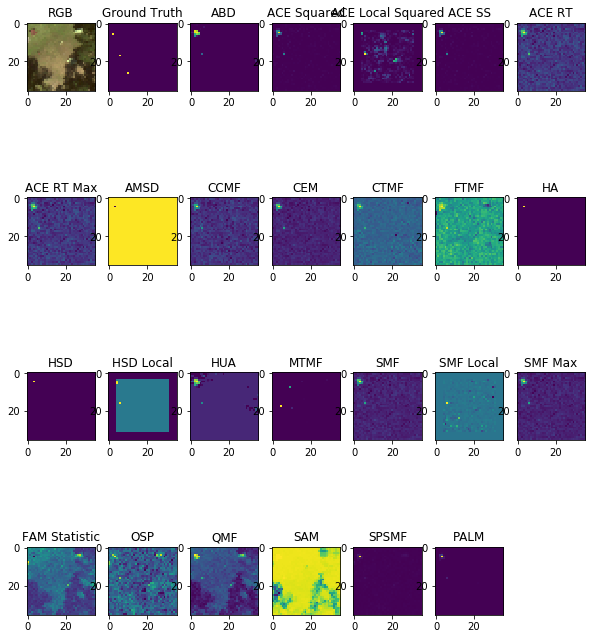

In [2]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=.5)
n_row = 5; n_col = 7
#
i = 1
for key, value in det_out.items():
	plt.subplot(n_row, n_col, i);
	plt.imshow(value); plt.title(key)
	i += 1
plt.show()



In [3]:
abd_detector(hsi_sub, tgt_spectra, ems)

array([[2.23838852e-09, 6.16583593e-04, 1.77935966e-06, ...,
        1.05317384e-08, 1.05240752e-08, 1.05240752e-08],
       [1.28654165e-07, 8.87088025e-04, 1.08201551e-02, ...,
        1.15414137e-08, 9.39366331e-09, 1.03559334e-08],
       [3.92276987e-04, 3.92276987e-04, 2.91367601e-06, ...,
        1.13094136e-08, 1.13070105e-08, 1.10434053e-08],
       ...,
       [1.06845127e-08, 1.12436078e-08, 1.06890343e-08, ...,
        1.08148927e-08, 1.08188788e-08, 1.13001575e-08],
       [9.32784582e-09, 1.16888824e-08, 5.13205497e-09, ...,
        1.02930475e-08, 9.93151236e-09, 1.14333836e-08],
       [8.16837329e-09, 1.98880947e-09, 3.16730947e-09, ...,
        1.09381324e-08, 1.09381324e-08, 1.08525682e-08]])

In [4]:
amsd_detector(hsi_sub, tgt_spectra, n_dim_tgt = 1, n_dim_bg = 3)

array([[2.01557213e-01, 3.80035113e-01, 1.78588254e-01, ...,
        3.75993606e-03, 3.46318701e-03, 3.46318701e-03],
       [7.02615558e-01, 2.42122422e-01, 4.15263553e-01, ...,
        2.32400243e-02, 1.16637436e-03, 1.47882750e-02],
       [3.52279151e-01, 3.52279151e-01, 4.16155088e-01, ...,
        1.86682553e-03, 1.86943585e-02, 2.44413038e-03],
       ...,
       [1.83518492e-02, 1.96060040e-01, 2.91882343e-01, ...,
        1.41199020e-02, 3.37918841e-04, 8.47951761e-03],
       [3.34182965e-02, 8.14334478e-02, 2.00970604e-01, ...,
        1.10971895e-02, 1.29184788e-04, 3.59303090e-03],
       [1.53808100e-01, 1.34741446e-03, 2.12013321e-01, ...,
        5.80622192e-03, 5.80622192e-03, 1.11966821e-03]])

In [5]:
ccmf_detector(hsi_sub, tgt_spectra, n_comp = 2)

/usr/local/anaconda3/envs/bioinfo3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


(array([[-1.05667196, -0.17270799,  0.34048597, ..., -0.17593436,
         -0.29352909, -0.29352909],
        [-0.15989195, -0.27694394,  0.32701286, ...,  0.27919895,
          0.36458342, -0.66408538],
        [ 0.1848808 ,  0.1848808 , -0.47279122, ...,  0.19618935,
          0.05205532, -0.69872554],
        ...,
        [ 0.41776198, -0.18913054, -0.32896551, ...,  0.76759126,
         -0.78635468,  0.20766838],
        [-0.20202175,  0.3092406 , -0.58917694, ...,  0.66355354,
          0.70897249,  0.28092647],
        [-0.27914953, -0.61820818,  0.4859225 , ..., -0.06435706,
         -0.06435706, -0.07994924]]),
 GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
         means_init=None, n_components=2, n_init=1, precisions_init=None,
         random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None))

In [6]:
cem_detector(hsi_sub, tgt_spectra)

(array([[-0.07120437, -0.05821802, -0.02014567, ..., -0.01735941,
         -0.00987825, -0.00987825],
        [-0.03046389, -0.04900339,  0.01205945, ...,  0.01856765,
          0.0553233 , -0.04986643],
        [ 0.00614553,  0.00614553, -0.02535164, ...,  0.02311184,
          0.00800126, -0.05514993],
        ...,
        [ 0.0242378 , -0.00680627, -0.01348313, ...,  0.06124508,
         -0.02178687, -0.0246405 ],
        [-0.01413657,  0.01938737, -0.06892931, ...,  0.04184077,
          0.03585028,  0.01928173],
        [-0.03191881, -0.01613746,  0.03239941, ..., -0.01716567,
         -0.01716567, -0.00427683]]), array([[-0.01600896],
        [ 0.22672593],
        [ 0.19549069],
        [ 0.53090964],
        [-1.31921495],
        [-0.4200491 ],
        [ 0.91955292],
        [ 0.98726846],
        [ 0.30578857],
        [ 1.6201041 ],
        [-1.67779492],
        [ 1.95398035],
        [-1.28754299],
        [-0.69690027],
        [ 0.12685277],
        [-0.09400578],
      

In [7]:
ctmf_detector(hsi_sub, tgt_spectra, n_cluster = 2)

(array([[-1.07209149, -0.71147974, -0.29113474, ..., -0.50708765,
         -0.38671369, -0.38671369],
        [-0.38009   , -0.67811092,  0.31354012, ...,  0.16279965,
         -0.40784929,  0.00252083],
        [ 0.04119739,  0.04119739, -0.03853369, ..., -0.72065287,
         -0.55370249, -1.25455137],
        ...,
        [ 0.52720541, -0.76131077, -1.56895426, ...,  0.6454598 ,
         -0.81994395,  0.82380436],
        [-0.38742175, -0.04486795, -1.44937945, ..., -0.50523113,
          0.86647006,  1.46736025],
        [-0.22796578, -0.60077573,  0.35576646, ...,  0.64475916,
          0.64475916, -0.88101317]]), array([[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1]], dtype=int32))

In [8]:
ftmf_detector(hsi_sub, tgt_spectra, gamma = 1)

array([[504.74244722, 519.10404152, 537.31883061, ..., 615.72395888,
        602.40033837, 602.40033837],
       [562.73870442, 512.16792606, 634.81707064, ..., 620.58761692,
        633.56636772, 613.03587567],
       [583.58081213, 583.58081213, 549.63735774, ..., 632.71237968,
        631.34527348, 569.38578364],
       ...,
       [628.36390184, 595.66245528, 610.12700615, ..., 633.95600812,
        631.48479193, 616.00372179],
       [597.37044927, 622.36047706, 535.72460871, ..., 634.53278619,
        619.4268119 , 566.67733654],
       [633.65924728, 563.48316451, 607.92626348, ..., 594.62962131,
        594.62962131, 643.45483723]])

In [9]:
fam_statistic(hsi_sub, tgt_spectra)

array([[204.87764712, 207.41572059, 197.64366671, ...,  64.98102445,
         79.16883125,  79.16883125],
       [199.58910996, 209.79026199, 167.95263963, ...,  77.20962679,
         71.31509513,  72.78463227],
       [181.34833967, 181.34833967, 189.83057418, ...,  61.53214503,
         55.76482026,  78.3224042 ],
       ...,
       [ 61.38916608,  88.66860839,  58.42579158, ...,  72.64436834,
         51.67070114,  71.52139614],
       [ 77.88823095,  58.38391125, 144.85663727, ...,  51.2894373 ,
         66.72432729,  73.55753094],
       [ 80.84507982, 133.81892944,  94.95641874, ...,  60.22373795,
         60.22373795,  52.28123433]])

In [10]:
ftmf_detector(hsi_sub, tgt_spectra, gamma = 1)

array([[504.74244722, 519.10404152, 537.31883061, ..., 615.72395888,
        602.40033837, 602.40033837],
       [562.73870442, 512.16792606, 634.81707064, ..., 620.58761692,
        633.56636772, 613.03587567],
       [583.58081213, 583.58081213, 549.63735774, ..., 632.71237968,
        631.34527348, 569.38578364],
       ...,
       [628.36390184, 595.66245528, 610.12700615, ..., 633.95600812,
        631.48479193, 616.00372179],
       [597.37044927, 622.36047706, 535.72460871, ..., 634.53278619,
        619.4268119 , 566.67733654],
       [633.65924728, 563.48316451, 607.92626348, ..., 594.62962131,
        594.62962131, 643.45483723]])

In [11]:
ha_detector(hsi_sub, tgt_spectra, ems, n_comp = 2)

/usr/local/anaconda3/envs/bioinfo3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


array([[1.06591342, 0.4916003 , 0.99998934, ..., 1.044148  , 1.044148  ,
        1.044148  ],
       [1.00048628, 0.55341126, 1.03881753, ..., 1.044148  , 1.04414801,
        1.044148  ],
       [0.56965284, 0.56965284, 1.00068035, ..., 1.04414833, 1.04414833,
        1.04414799],
       ...,
       [1.044148  , 1.04414799, 1.04414799, ..., 1.04414823, 1.04414822,
        1.04414824],
       [1.044148  , 1.04414798, 1.04414798, ..., 1.04414823, 1.04414822,
        1.044148  ],
       [1.04414799, 1.04414804, 1.04414802, ..., 1.04414824, 1.04414824,
        1.04414825]])

In [12]:
hsd_detector(hsi_sub, tgt_spectra, ems)

(array([[0.99829405, 0.67922935, 1.00000974, ..., 1.00000055, 1.00000065,
         1.00000065],
        [0.99999167, 0.52862148, 1.01597829, ..., 1.00000054, 1.00000033,
         1.00000055],
        [0.79427166, 0.79427166, 1.00032217, ..., 0.99999031, 0.99998876,
         1.00000077],
        ...,
        [1.00000073, 1.00000067, 1.00000079, ..., 0.99999521, 0.99999239,
         0.99999206],
        [1.0000005 , 1.00000097, 1.00000054, ..., 0.99999339, 0.99999513,
         1.00000059],
        [1.00000058, 0.99999987, 1.0000002 , ..., 0.99999205, 0.99999205,
         0.99999274]]),
 array([[2.23838852e-09, 6.16583593e-04, 1.77935966e-06, ...,
         1.05317384e-08, 1.05240752e-08, 1.05240752e-08],
        [1.28654165e-07, 8.87088025e-04, 1.08201551e-02, ...,
         1.15414137e-08, 9.39366331e-09, 1.03559334e-08],
        [3.92276987e-04, 3.92276987e-04, 2.91367601e-06, ...,
         1.13094136e-08, 1.13070105e-08, 1.10434053e-08],
        ...,
        [1.06845127e-08, 1.12436078e

In [13]:
hsd_local_detector(hsi_sub, tgt_spectra, ems, guard_win = guard_win, bg_win = bg_win, beta = beta)

.
.
.




array([[6.93760365e-310, 6.93760365e-310, 4.64329802e-310, ...,
        4.64329596e-310, 4.64329596e-310, 4.64329596e-310],
       [4.64329596e-310, 4.64329596e-310, 4.64329596e-310, ...,
        4.64329596e-310, 4.64329596e-310, 4.64329596e-310],
       [4.64329596e-310, 4.64329596e-310, 4.64329596e-310, ...,
        4.64329596e-310, 4.64329596e-310, 4.64329596e-310],
       ...,
       [6.93751871e-310, 6.93751871e-310, 6.93751871e-310, ...,
        6.93751871e-310, 6.93751871e-310, 6.93751871e-310],
       [6.93751871e-310, 6.93751871e-310, 6.93751871e-310, ...,
        6.93751871e-310, 6.93751871e-310, 6.93751871e-310],
       [6.93751871e-310, 6.93751871e-310, 6.93751871e-310, ...,
        6.93751871e-310, 6.93751871e-310, 6.93751871e-310]])

In [14]:
hua_detector(hsi_sub, tgt_spectra, ems, n_comp = 2)

/usr/local/anaconda3/envs/bioinfo3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


array([[1.34739309e-01, 4.19938612e-04, 1.24829766e-06, ...,
        2.24386802e-01, 2.24386806e-01, 2.24386806e-01],
       [7.20794938e-04, 6.01523659e-04, 9.02070904e-03, ...,
        2.24386803e-01, 2.24386800e-01, 2.24386803e-01],
       [2.24589817e-01, 2.24589817e-01, 2.08719328e-06, ...,
        2.24387905e-01, 2.24387927e-01, 2.24386809e-01],
       ...,
       [2.24386806e-01, 2.24386808e-01, 2.24386806e-01, ...,
        2.24387538e-01, 2.24387543e-01, 2.24387654e-01],
       [2.24386804e-01, 2.24386812e-01, 2.24386878e-01, ...,
        2.24387528e-01, 2.24387456e-01, 2.24386803e-01],
       [2.24386810e-01, 2.24386905e-01, 2.24386846e-01, ...,
        2.24387609e-01, 2.24387609e-01, 2.24387615e-01]])

In [15]:
mtmf_statistic(hsi_sub, tgt_spectra)

(array([[  441166.07479956,  6317482.69104192,  8953895.77801577, ...,
         14435539.12556637, 11773642.34802508, 11773642.34802508],
        [ 1594808.45589639,  1355964.10496339,  2044370.43779497, ...,
         17844953.8220372 , 14568671.59017836, 11646989.98293751],
        [75192057.2737664 , 75192057.2737664 , 67473897.15415654, ...,
         18374894.90898056, 18671907.46924594,  7964144.07598925],
        ...,
        [10467915.72453871, 10797629.62800754, 12004099.76805737, ...,
         26922030.96829147, 30091762.25568686, 26656582.29452596],
        [11008155.31393769,  9791600.4503558 ,  1654929.89250584, ...,
         29233271.07851427, 29131429.36267765, 15617509.72744313],
        [ 6590757.21433115,  9099285.98153804,  1714659.43270792, ...,
         25145372.6002169 , 25145372.6002169 , 25369932.00554153]]),
 array([[0.30464724, 0.36893629, 0.36811215, ..., 0.        , 0.        ,
         0.        ],
        [0.33785384, 0.39003784, 0.38023026, ..., 0.        ,

In [16]:
osp_detector(hsi_sub, tgt_spectra, n_dim_ss = 10)

array([[ 2.31246840e-04, -8.99600547e-05,  1.65300838e-04, ...,
        -5.40042508e-05, -9.95549084e-04, -9.95549084e-04],
       [-3.38034976e-05, -5.89698469e-04,  2.40297717e-04, ...,
         1.12220445e-03,  1.05563866e-03, -7.32354622e-04],
       [ 5.62803117e-04,  5.62803117e-04,  1.85797245e-04, ...,
         7.78619504e-04,  2.46687193e-04,  1.16138180e-04],
       ...,
       [-1.01433239e-03, -4.56695241e-04, -3.47989590e-04, ...,
         1.37928036e-04, -1.24649908e-03, -1.03946977e-03],
       [ 4.46702633e-04, -5.19672263e-04, -5.48020512e-04, ...,
        -1.42346585e-03,  1.42566654e-03, -1.04407755e-03],
       [-1.16699774e-03,  1.01820860e-03, -5.29166443e-04, ...,
        -4.87413881e-04, -4.87413881e-04,  4.33935592e-04]])

In [17]:
palm_detector(hsi_sub, tgt_spectra, n_comp = 5)

/usr/local/anaconda3/envs/bioinfo3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


array([[5.88241934e-01, 1.56857869e-03, 8.52397866e-02, ...,
        8.46331489e-03, 9.78877325e-03, 9.78877325e-03],
       [4.48076640e-02, 4.54995138e-01, 5.51732160e-03, ...,
        1.08100786e-02, 2.59346337e-02, 6.49755279e-02],
       [2.73944254e-03, 2.73944254e-03, 1.24011171e-01, ...,
        3.39830566e-04, 1.29141140e-02, 8.95317934e-02],
       ...,
       [1.78993892e-05, 1.46634802e-02, 1.53716476e-02, ...,
        2.92841489e-02, 3.05103073e-02, 5.56168024e-04],
       [3.52660407e-03, 6.32149358e-03, 1.62473551e-03, ...,
        1.70206209e-03, 1.19506997e-01, 5.61993336e-05],
       [5.55856388e-02, 6.13523730e-02, 9.17299975e-03, ...,
        8.27986794e-03, 8.27986794e-03, 2.51347938e-02]])

In [18]:
qmf_detector(hsi_sub, tgt_spectra, 0.1 * np.eye(hsi_sub.shape[2]))

array([[-507.90646314, -509.65954556, -510.68038117, ..., -557.2596916 ,
        -547.37957012, -547.37957012],
       [-506.08899387, -508.25343643, -520.19253659, ..., -549.82843084,
        -549.84470825, -555.0454727 ],
       [-510.18800374, -510.18800374, -512.57172489, ..., -559.40691913,
        -563.43128544, -551.22970103],
       ...,
       [-556.17489599, -541.70467375, -559.55295233, ..., -557.4039366 ,
        -571.48980316, -559.16923615],
       [-548.58571731, -556.23595288, -518.03655663, ..., -570.61468325,
        -561.54940539, -552.21413846],
       [-547.14214692, -516.96443862, -531.7095186 , ..., -564.27119898,
        -564.27119898, -567.96998003]])

In [19]:
sam_detector(hsi_sub, tgt_spectra)

array([[0.98910218, 0.98949939, 0.98922575, ..., 0.96963644, 0.97691816,
        0.97691816],
       [0.99003452, 0.98968494, 0.99008393, ..., 0.94905466, 0.97229588,
        0.97827619],
       [0.99062675, 0.99062675, 0.99067307, ..., 0.94904101, 0.96409029,
        0.97676063],
       ...,
       [0.97089803, 0.96916294, 0.97085458, ..., 0.87691957, 0.89543617,
        0.9336856 ],
       [0.97446138, 0.96859926, 0.98228657, ..., 0.86987305, 0.88876194,
        0.93902081],
       [0.98175263, 0.98668104, 0.98039168, ..., 0.91043502, 0.91043502,
        0.93108237]])

In [20]:
spsmf_detector(hsi_sub, tgt_spectra)

array([[-302.38317907, -310.85804668, -303.36688797, ..., -321.6493059 ,
        -311.04748925, -311.04748925],
       [-288.35576161, -311.27967453, -302.89390064, ..., -301.51644048,
        -306.17141558, -316.4731133 ],
       [-297.35344258, -297.35344258, -308.24484141, ..., -317.86720984,
        -326.47288198, -330.02518975],
       ...,
       [-326.15641931, -301.59400722, -337.83242122, ..., -299.5619672 ,
        -325.38584173, -304.71186138],
       [-316.61992644, -335.08047278, -291.8493409 , ..., -329.72428408,
        -312.01795286, -325.1074992 ],
       [-309.7570775 , -296.2610739 , -317.43135933, ..., -328.29257972,
        -328.29257972, -322.24588324]])